# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Data historikal kurs dolar yang 'up to date' sangat penting bagi para pelaku pasar. Melalui analisis tren dan pergerakan pasar, data ini memungkinkan untuk mengidentifikasi pola perubahan nilai tukar, memperoleh wawasan tentang risiko pasar, dan membuat keputusan investasi yang terinformasi, maupun menemukan peluang-peluang investasi.

Maka dari itu diperlukan 'tools' yang mudah digunakan, data aktual, dan informatif untuk menunjukkan data istorikal kurs dolar tersebut. Pada projek ini ditujukan untuk memenuhi kebutuhan tersebut dengan membangun UI yang mudah diakses untuk mendapatkan informasi data historikal tersebut

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [50]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [51]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [52]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Terlihat pada website bahwa tabel yang berisi data terdapat pada class *history-rates-data*. maka pada langkah ini kita masukkan pada metode find.

In [64]:
table = soup.find(class_="history-rates-data")
print(table.prettify()[1:700])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-12-14">
     December 14, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-12-14">
     2023-12-14
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      15,476
     <


 ***Mencari Row Length***

 Diperlukan untuk mengetahui seberapa banyak data yang ada didalam website maka perlu diambil ada berapa banyak row pada tabel tersebet. Data dalam tabel row tersebut tersimpan dalam section class *n* dalam class tersebut terdapat 2 section yang memisahkan antara data tanggal dengan data rate tukar yaitu section a dan span. Maka diambil salah satu saja untuk menemukan banyak row

In [54]:
exchange_rate = table.find_all('span', class_='n')
row_length = len(exchange_rate)
row_length

129

Seperti yang sudah dijelaskan diatas bahwa sudah ditemukan lokasi data. yang diperlukan hanya untuk mescrape data tersebut dengan proses scrapping dibawah

In [ ]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process

    #get date
    date = table.find_all('a', class_='n')[i].text
    #get rate
    rate = table.find_all('span', class_='n')[i].text[7:]
    rate = rate.replace(',','')

    temp.append((date,rate))
temp

Metode scrape diatas secara sederhana untuk mengambil data pada tabel date dan nilai tukar. pada bagian pengambilan data tanggal sangat sederhana yaitu menggunakan proses *for loop* untuk mengambil data tanggal sebanyak jumlah row yang sudah di temukan pada bagian sebelumnya dan hanya mengambil bagian textnya saja.

Ada tantangan pada pengambilan data rate tukar yang dimana didalam tabel data tertulis "1$ = Rp15,xxx". ketika ingin di visualisasikan diperlukan data tersebut berbentuk number maka perlu diatur cara pengambilan. Perlu diketahui bahwa data yang dibutuhkan hanya "15,xxx" yang dilakukan adalah dengan memodifikasi .text untuk mengambil karakter ke-7 (python menghitung mulai dari 0) maka ekstrak '.text[7: ]'. perlu dilakukan penghilangan , dengan fungsi replace agar data dapat diubah tipenya menjadi number.

Lalu kita gunakan metode append untuk memasukkan setiap baris data untuk dimasukkan pada list temp yang sebelumnya sudah di buat.

## Creating data frame & Data wrangling

Memasukkan array diatas menjadi dataframe menggunakan pandas

In [56]:
import pandas as pd

data = pd.DataFrame(temp, columns= ['Date','Rate'])
data.head()

,Date,Rate
0,2023-12-13,15360
1,2023-12-12,15576
2,2023-12-11,15653
3,2023-12-8,15573
4,2023-12-7,15507


ketika dilakukan pengecekan tipe menggunakan .dtypes semua data masih berbentuk object. Maka dari itu perlu penyesuaian tipe menggunakan metode astype untuk merubah tanggal menjadi datetime dan rate menjadi integer. 

tidak hanya merubah tipe, dilakukan juga metode set_index untuk membuat data tanggal menjadi index pada dataframe. hal ini dilakukan untuk mempermudah pembuatan visualisasi plotting.

In [57]:

data['Date'] = data['Date'].astype('datetime64[ns]')
data['Rate'] = data['Rate'].astype('int64')
data = data.set_index('Date')
data.dtypes

Rate    int64
dtype: object

Untuk memberikan informasi yang berguna kepada pengguna, seperti yang dijelaskan pada latar belakang. dibuatlah data visualisasi data tersebut dengan line chart. alasan line chart sangat cocok untuk data ini adalah karena data berbentuk time-series dimana pengguna ingin melihat perubahan rate secara periodik dan dengan line menjadi sangat terlihat perubahan naik atau turunnya. 

<Axes: xlabel='Date'>

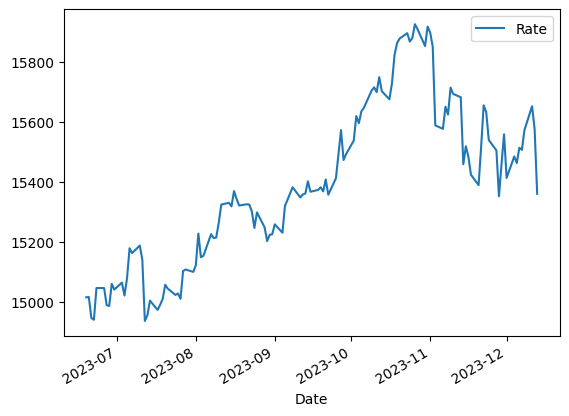

In [58]:
data.plot()

Pada data diatas terdapat beberapa poin insight yang dapat diambil dari chart diatas diantaranya:

1. Pada bulan July hingga November IDR terlihat melemah terhadap USD
2. secara short term terlihat bahwa USD sedang melemah terhadap IDR di bebrapa minggu ini